<a href="https://colab.research.google.com/github/Hari-Priya-18/Image-denoising/blob/main/band2_rad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

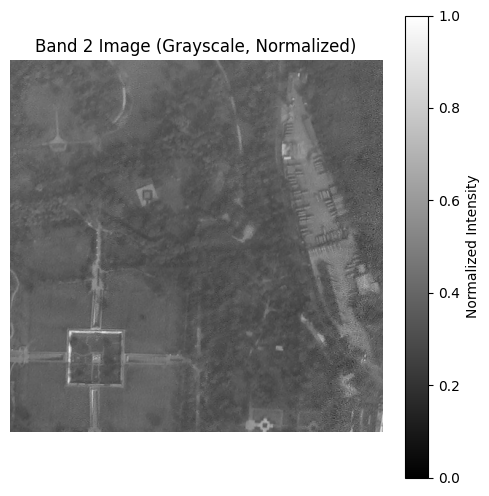

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the .rad file
file_path = "/content/band2_image2.rad"

# Read raw binary data assuming uint16 and image shape 512x512
image = np.fromfile(file_path, dtype=np.uint16).reshape((512, 512))

# Optional: Normalize for better visualization
image_normalized = (image - np.min(image)) / (np.max(image) - np.min(image))

# Display using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_normalized, cmap='gray')
plt.title("Band 2 Image (Grayscale, Normalized)")
plt.axis("off")
plt.colorbar(label='Normalized Intensity')
plt.show()


In [3]:
pip install opencv-python scikit-image matplotlib


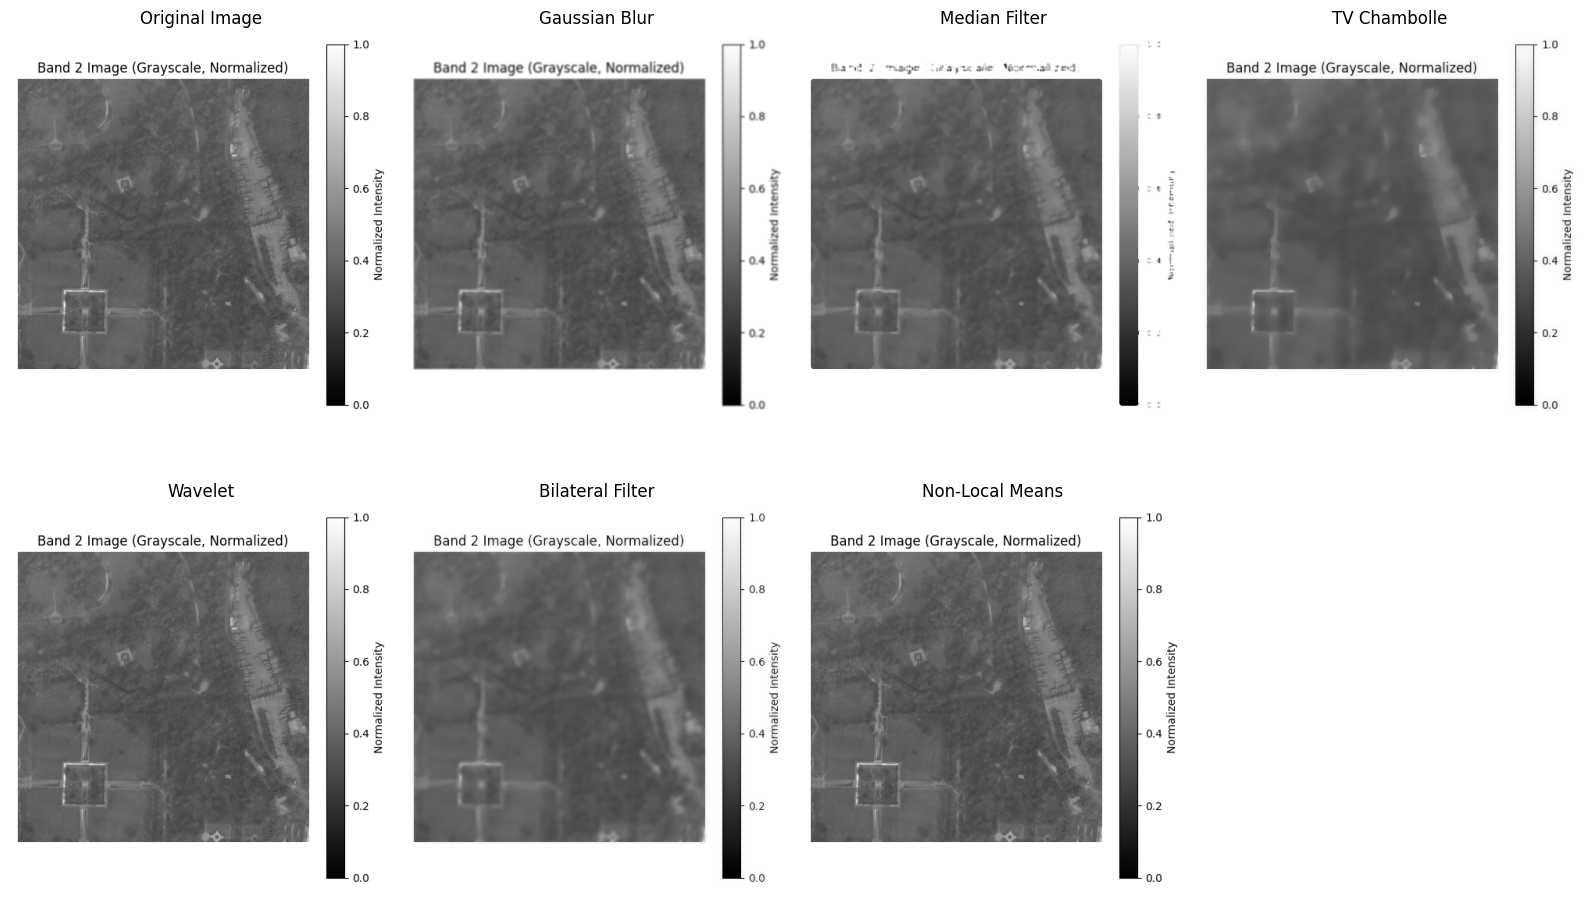

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.restoration import denoise_tv_chambolle, denoise_wavelet, denoise_nl_means, estimate_sigma

# Load grayscale image
image = cv2.imread('/content/band2_rad_2.png', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    image = img_as_float(image)  # Normalize to [0, 1]

    # 1. Gaussian Blur
    gaussian = cv2.GaussianBlur(image, (5, 5), 1)

    # 2. Median Filter
    median = cv2.medianBlur((image * 255).astype(np.uint8), 5)
    median = img_as_float(median)

    # 3. Total Variation (TV Chambolle)
    tv = denoise_tv_chambolle(image, weight=0.1)

    # 4. Wavelet Denoising
    wavelet = denoise_wavelet(image, rescale_sigma=True)

    # 5. Bilateral Filter
    bilateral = cv2.bilateralFilter((image * 255).astype(np.uint8), 9, 75, 75)
    bilateral = img_as_float(bilateral)

    # 6. Non-Local Means
    sigma_est = np.mean(estimate_sigma(image, channel_axis=None))
    nlm = denoise_nl_means(image, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=6, channel_axis=None)

    # Plotting all results
    titles = [
        'Original Image', 'Gaussian Blur', 'Median Filter',
        'TV Chambolle', 'Wavelet', 'Bilateral Filter', 'Non-Local Means'
    ]
    images = [image, gaussian, median, tv, wavelet, bilateral, nlm]

    plt.figure(figsize=(16, 10))
    for i in range(len(images)):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
pip install scikit-image


In [9]:
from skimage.metrics import peak_signal_noise_ratio as psnr

# Calculate PSNR values
psnr_values = {
    'Gaussian Blur': psnr(image, gaussian),
    'Median Filter': psnr(image, median),
    'TV Chambolle': psnr(image, tv),
    'Wavelet': psnr(image, wavelet),
    'Bilateral Filter': psnr(image, bilateral),
    'Non-Local Means': psnr(image, nlm)
}

# Print results
print("PSNR (in dB) for each method:")
for method, value in psnr_values.items():
    print(f"{method}: {value:.2f} dB")


PSNR (in dB) for each method:
Gaussian Blur: 24.74 dB
Median Filter: 21.63 dB
TV Chambolle: 31.10 dB
Wavelet: 65.01 dB
Bilateral Filter: 32.40 dB
Non-Local Means: 75.33 dB
